In [14]:
import numpy as np

ds = np.load('modelnet10_val.npz')
samples = ds['samples']
labels = ds['labels']
print("samples shape: %s, labels shape: %s" %(samples.shape, labels.shape))

dim =32

samples shape: (908, 4000, 3), labels shape: (908,)


In [15]:
def pointcloud2volume(pc, dim=32):
    vol = np.zeros((dim,dim,dim))
    tempPC = np.copy(pc)
    tempPC *= (dim-1) 
    tempPC = tempPC.astype(int)
    vol[tempPC[:,0],tempPC[:,1],tempPC[:,2]] = 1.0
    return vol

In [16]:
def vol2depthmap(v, bg_val=40.):
    temp0=np.zeros((dim,dim,7))
    temp1=np.ones((dim,dim,1))
    temp=np.concatenate((temp0, temp1),axis=2)
    temp=np.concatenate((v, temp),axis=2)
    depthmap = temp.argmax(2)
  
    return depthmap

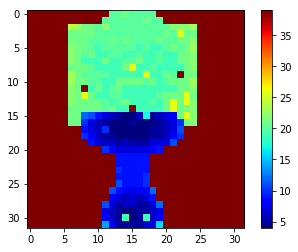

In [5]:
v = pointcloud2volume(samples[4])
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(vol2depthmap(v), cmap='jet')
plt.colorbar()

In [17]:
def printDepthMap (im):
    %matplotlib inline
    from matplotlib import pyplot as plt
    plt.imshow(im, cmap='jet')
    plt.colorbar()

In [25]:
def CreateDepthMapDataset (samples):
    DepthMapDataset= np.zeros((len(samples),dim,dim)) 
    for i in range(len(samples)):
        vol=pointcloud2volume(samples[i])
        temp=np.array([vol2depthmap(vol)])
        DepthMapDataset[i] = temp
    return DepthMapDataset

In [26]:
# import matplotlib as matplotlib
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10


# input image dimensions
img_rows, img_cols = dim,dim

# the data, shuffled and split between train and test sets
'''load val'''
samplesData = CreateDepthMapDataset (samples)

'''load train'''
modelnet10_train = np.load('modelnet10_train.npz')
samplesTrain = modelnet10_train['samples']
labelsTrain = modelnet10_train['labels']
samplesDataTrain = CreateDepthMapDataset (samplesTrain)

    
(x_train, y_train)=(samplesDataTrain, labelsTrain)
(x_test, y_test) = (samplesData, labels)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (3991, 32, 32, 1)
3991 train samples
908 test samples


In [29]:
# import matplotlib as matplotlib
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3991 samples, validate on 908 samples
Epoch 1/100
3991/3991 [==============================] - 24s 6ms/step - loss: 2.0246 - acc: 0.2829 - val_loss: 1.8279 - val_acc: 0.3359
Epoch 2/100
3991/3991 [==============================] - 23s 6ms/step - loss: 1.2430 - acc: 0.5998 - val_loss: 1.5032 - val_acc: 0.4703
Epoch 3/100
3991/3991 [==============================] - 24s 6ms/step - loss: 0.9346 - acc: 0.7078 - val_loss: 1.0538 - val_acc: 0.6355
Epoch 4/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.7805 - acc: 0.7492 - val_loss: 1.0294 - val_acc: 0.6817
Epoch 5/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.7027 - acc: 0.7682 - val_loss: 0.8021 - val_acc: 0.7368
Epoch 6/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.6385 - acc: 0.7940 - val_loss: 0.7570 - val_acc: 0.7357
Epoch 7/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.6074 - acc: 0.7995 - val_loss: 0.7614 - val_acc: 0.7379
E

3991/3991 [==============================] - 23s 6ms/step - loss: 0.2152 - acc: 0.9246 - val_loss: 0.6000 - val_acc: 0.8128
Epoch 61/100
3991/3991 [==============================] - 24s 6ms/step - loss: 0.2000 - acc: 0.9328 - val_loss: 0.6123 - val_acc: 0.8040
Epoch 62/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.2040 - acc: 0.9263 - val_loss: 0.6316 - val_acc: 0.7985
Epoch 63/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.2036 - acc: 0.9283 - val_loss: 0.6342 - val_acc: 0.8139
Epoch 64/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.2027 - acc: 0.9256 - val_loss: 0.6391 - val_acc: 0.8040
Epoch 65/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.1950 - acc: 0.9339 - val_loss: 0.6342 - val_acc: 0.8095
Epoch 66/100
3991/3991 [==============================] - 23s 6ms/step - loss: 0.1890 - acc: 0.9359 - val_loss: 0.6397 - val_acc: 0.8007
Epoch 67/100
3991/3991 [==============================